In [17]:
#This code is only used as a reference:
#mongoimport --type csv -d DB_wildfire -c california_list --headerline --drop California_Fire_Incidents.csv



SyntaxError: invalid syntax (1608964646.py, line 1)

In [192]:
from pymongo import MongoClient
import pandas as pd
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
mongo = MongoClient(port=27017)

In [194]:
# assign the uk_food database to a variable name
db = mongo['DB_wildfire']

In [195]:
collections = db.list_collection_names()
collections

['california_list']

In [196]:
# assign the collection to a variable
california_l = db['california_list']

In [197]:
data = list(california_l.find())

In [198]:
df = pd.DataFrame(data)

In [199]:
# Delete the "_id" column of the data frame
if "_id" in df.columns:
    df.drop(columns=["_id"], inplace=True)

In [200]:
# Print the data frame
print(df.head())

   AcresBurned  Active                                          AdminUnit  \
0     257314.0   False  Stanislaus National Forest/Yosemite National Park   
1      30274.0   False  USFS Angeles National Forest/Los Angeles Count...   
2      27531.0   False  CAL FIRE Riverside Unit / San Bernardino Natio...   
3      27440.0   False                              Tahoe National Forest   
4      24251.0   False                       Ventura County Fire/CAL FIRE   

   ArchiveYear  CalFireIncident                           CanonicalUrl  \
0         2013             True         /incidents/2013/8/17/rim-fire/   
1         2013             True  /incidents/2013/5/30/powerhouse-fire/   
2         2013             True    /incidents/2013/7/15/mountain-fire/   
3         2013            False    /incidents/2013/8/10/american-fire/   
4         2013             True      /incidents/2013/5/2/springs-fire/   

      Counties CountyIds        Extinguished  Featured  ...  Injuries  \
0     Tuolumne     

In [201]:
# Select the first 5 rows of the data frame
df.head()

,AcresBurned,Active,AdminUnit,ArchiveYear,CalFireIncident,CanonicalUrl,Counties,CountyIds,Extinguished,Featured,...,Injuries,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,WaterTenders,ControlStatement,AirTankers,StructuresThreatened,Fatalities,FuelType
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,2013,True,/incidents/2013/8/17/rim-fire/,Tuolumne,55,2013-09-06 18:30:00,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,2013,True,/incidents/2013/5/30/powerhouse-fire/,Los Angeles,19,2013-06-08 18:30:00,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,/incidents/2013/7/15/mountain-fire/,Riverside,33,2013-07-30 18:00:00,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27440.0,False,Tahoe National Forest,2013,False,/incidents/2013/8/10/american-fire/,Placer,31,2013-08-30 08:00:00,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,2013,True,/incidents/2013/5/2/springs-fire/,Ventura,56,2013-05-11 06:30:00,False,...,10.0,2167.0,6.0,10.0,11.0,NaN,NaN,NaN,NaN,NaN


In [170]:
# How many columns have null values
print(df.isnull().sum())

AcresBurned                3
Active                     0
AdminUnit                  0
ArchiveYear                0
CalFireIncident            0
CanonicalUrl               0
Counties                   0
CountyIds                  0
Extinguished              59
Featured                   0
Final                      0
Latitude                   0
Location                   0
Longitude                  0
MajorIncident              0
Name                       0
PercentContained           3
Public                     0
SearchDescription         17
SearchKeywords           203
Started                    0
Status                     0
UniqueId                   0
Updated                    0
ConditionStatement      1352
CrewsInvolved           1465
Dozers                  1513
Engines                 1445
Helicopters             1552
Injuries                1516
PersonnelInvolved       1432
StructuresDamaged       1569
StructuresDestroyed     1461
WaterTenders            1490
ControlStateme

In [202]:
# Reduce the data frame by extracting "Acress Burned", "Archive Year", 
# "Latitude", "Longitude", "Counties", "CountyIds"
reduced_df = df.loc[:, ["AcresBurned", "ArchiveYear", "Counties",
                       "CountyIds", "Latitude", "Longitude"]]
reduced_df.head(10)

,AcresBurned,ArchiveYear,Counties,CountyIds,Latitude,Longitude
0,257314.0,2013,Tuolumne,55,37.857000,-120.086000
1,30274.0,2013,Los Angeles,19,34.585595,-118.423176
2,27531.0,2013,Riverside,33,33.709500,-116.728850
3,27440.0,2013,Placer,31,39.120000,-120.650000
4,24251.0,2013,Ventura,56,0.000000,0.000000
5,22992.0,2013,Fresno,10,37.279000,-119.318000
6,20292.0,2013,Riverside,33,33.861570,-116.904270
7,14754.0,2013,Siskiyou,47,41.320000,-123.176000
8,12503.0,2013,Humboldt,12,41.035000,-123.488000
9,11429.0,2013,Tehama,52,40.042630,-121.853970


In [203]:
reduced_df = reduced_df[["ArchiveYear", "Counties", "CountyIds", "AcresBurned",
                        "Latitude", "Longitude"]]
reduced_df.head()

,ArchiveYear,Counties,CountyIds,AcresBurned,Latitude,Longitude
0,2013,Tuolumne,55,257314.0,37.857000,-120.086000
1,2013,Los Angeles,19,30274.0,34.585595,-118.423176
2,2013,Riverside,33,27531.0,33.709500,-116.728850
3,2013,Placer,31,27440.0,39.120000,-120.650000
4,2013,Ventura,56,24251.0,0.000000,0.000000


In [204]:
# Visualize the data type of each column
reduced_df.dtypes

ArchiveYear      int64
Counties        object
CountyIds       object
AcresBurned    float64
Latitude       float64
Longitude      float64
dtype: object

In [205]:
# Turn the data type from "AcresBurned" column to float
reduced_df["AcresBurned"] = pd.to_numeric(reduced_df["AcresBurned"], errors = "coerce")


In [206]:
reduced_df.dtypes

ArchiveYear      int64
Counties        object
CountyIds       object
AcresBurned    float64
Latitude       float64
Longitude      float64
dtype: object

C:\Users\danie\AppData\Local\Temp\ipykernel_13968\3745075485.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_counties_acres.values, y=top_counties_acres.index, palette="Blues_r")


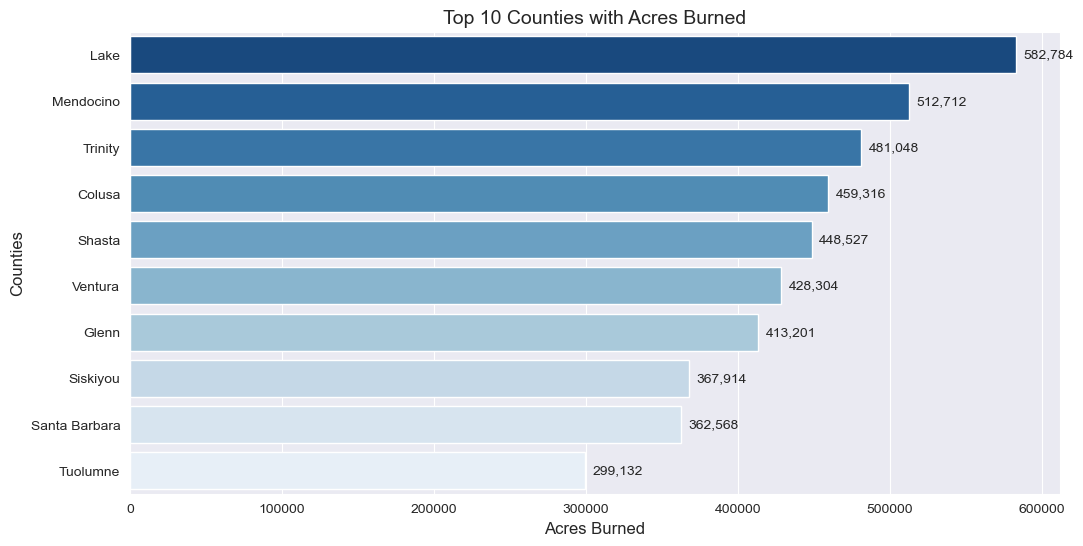

In [207]:
acres_per_county = reduced_df.groupby("Counties")["AcresBurned"].sum().sort_values(ascending=False)
top_counties_acres = acres_per_county.head(10)
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_counties_acres.values, y=top_counties_acres.index, palette="Blues_r")
plt.xlabel("Acres Burned", fontsize=12)
plt.ylabel("Counties", fontsize=12)
plt.title("Top 10 Counties with Acres Burned", fontsize=14)

# Agregar valores encima de las barras
for i, v in enumerate(top_counties_acres.values):
    ax.text(v + 5000, i, f"{int(v):,}", va="center", fontsize=10)  # Ajusta según el rango de datos

# Guardar y mostrar
plt.savefig("Top_Counties_with_Acres_Burned_Seaborn.png", bbox_inches="tight")
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_13968\1041430043.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


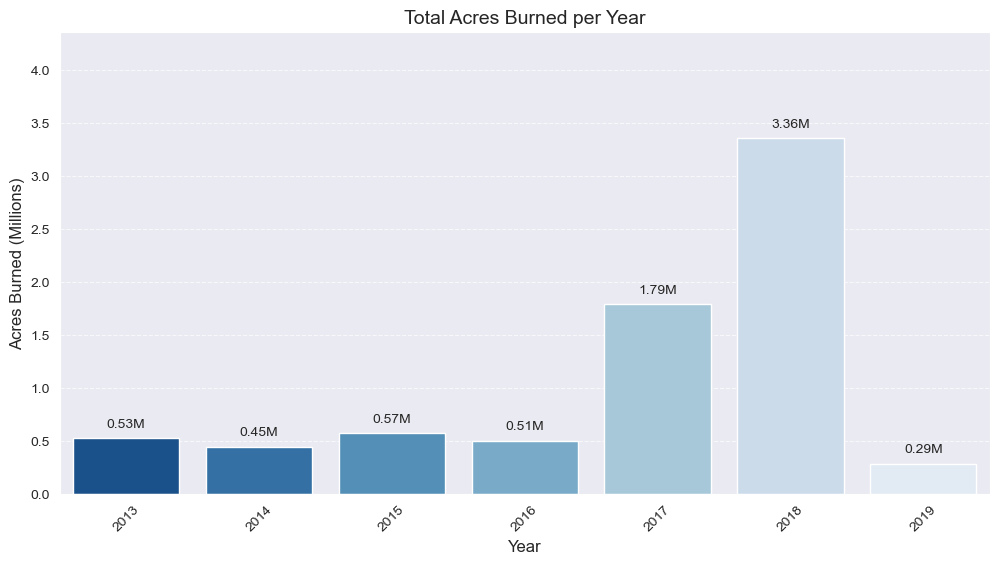

In [208]:
acres_burned_per_year = reduced_df.groupby("ArchiveYear")["AcresBurned"].sum()
acres_burned_per_year_million = acres_burned_per_year / 1000000

sns.set_style("darkgrid")
plt.figure(figsize=(12,6))

ax = sns.barplot(
    x = acres_burned_per_year_million.index,
    y = acres_burned_per_year_million.values,
    palette = "Blues_r"
)

plt.xlabel("Year", fontsize = 12)
plt.ylabel("Acres Burned (Millions)", fontsize = 12)
plt.title("Total Acres Burned per Year", fontsize = 14)

for i, value in enumerate(acres_burned_per_year_million):
    ax.text(i, value + 0.1, f'{value:,.2f}M', ha='center', fontsize=10)

plt.ylim(0, acres_burned_per_year_million.max() + 1)
plt.xticks(rotation= 45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig("Total_Acres_Burned_per_Year_Seaborn.png", bbox_inches="tight")
plt.show()

Enter the start year (2013-2019):  2014
Enter the end year (2013-2019):  2019


C:\Users\danie\AppData\Local\Temp\ipykernel_13968\3805737317.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


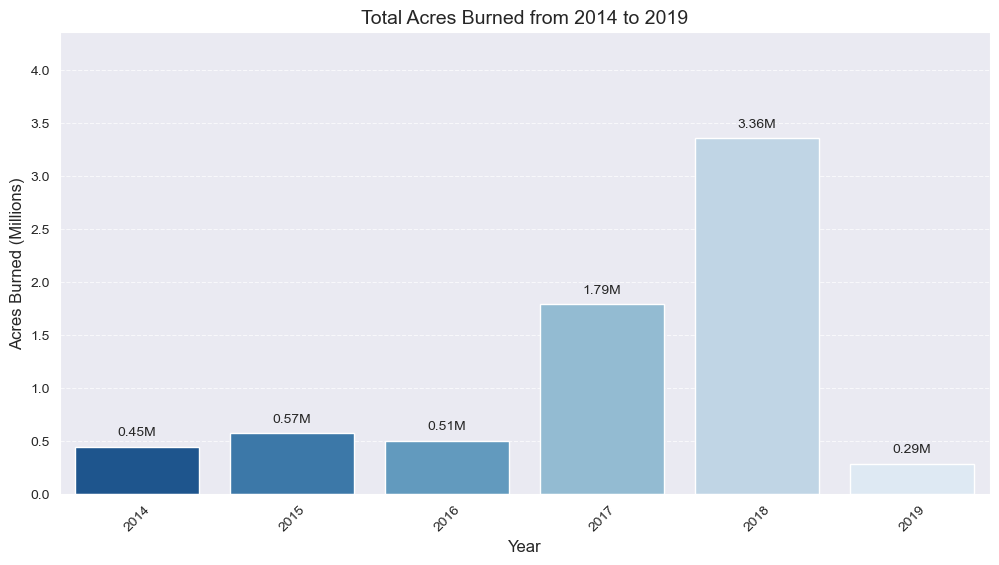

In [209]:
# Interactive plot
# Define the valid year range 
MIN_YEAR, MAX_YEAR = 2013,2019

# Get user input for year range with validation
while True:
    try:
        start_year = int(input(f"Enter the start year ({MIN_YEAR}-{MAX_YEAR}): "))
        end_year = int(input(f"Enter the end year ({MIN_YEAR}-{MAX_YEAR}): "))
        
        if start_year < MIN_YEAR or end_year > MAX_YEAR or start_year > end_year:
            print(f"Please enter a valid range between {MIN_YEAR} and {MAX_YEAR}.")
        else:
            break
    except ValueError:
        print("Invalid input. Please enter a valid year.")

# Group by year and sum acres burned
acres_burned_per_year = reduced_df.groupby("ArchiveYear")["AcresBurned"].sum()

# Convert to millions
acres_burned_per_year_million = acres_burned_per_year / 1000000

# Filter data based on the selected year range
filtered_data = acres_burned_per_year_million.loc[start_year:end_year]

# Set Seaborn style
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

# Creat bar plot
ax = sns.barplot(
    x = filtered_data.index,
    y = filtered_data.values,
    palette = "Blues_r"
)

# Labels and title

plt.xlabel("Year", fontsize=12)
plt.ylabel("Acres Burned (Millions)", fontsize=12)
plt.title(f"Total Acres Burned from {start_year} to {end_year}", fontsize=14)

# Add value labels on bars
for i, value in enumerate(filtered_data):
    ax.text(i, value + 0.1, f'{value:,.2f}M', ha='center', fontsize=10)

# Adjust axes and grid
plt.ylim(0, filtered_data.max() + 1)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save and show plot
plt.savefig(f"Total_Acres_Burned_{start_year}_{end_year}.png", bbox_inches="tight")
plt.show()


Choose how many counties to visualize (max 59):  7


C:\Users\danie\AppData\Local\Temp\ipykernel_13968\1290847954.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


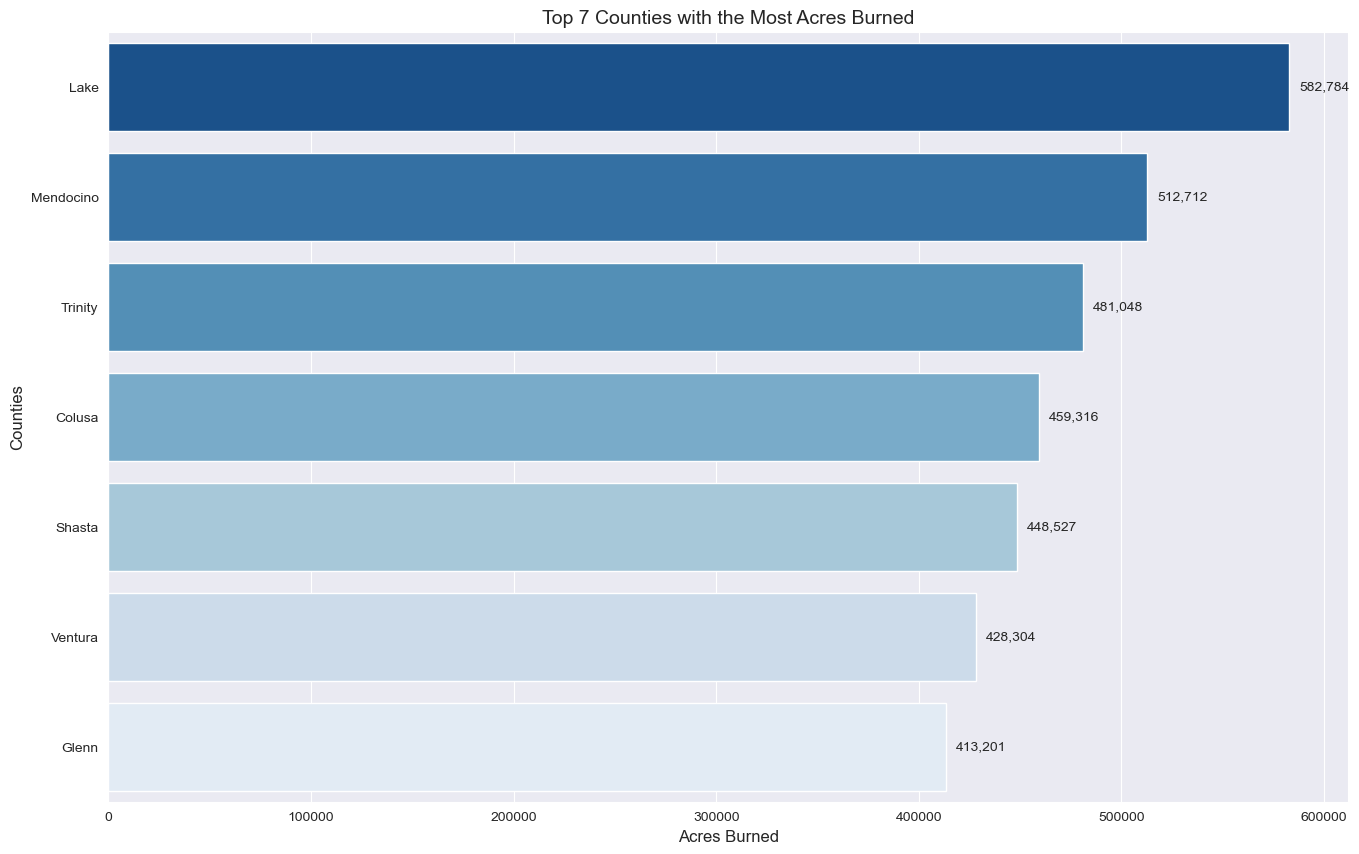

In [210]:
# Interactive plot
# Get the total number of unique counties
max_counties = reduced_df["Counties"].nunique()

# Validate the user input
while True:
    try:
        user_d = int(input(f"Choose how many counties to visualize (max {max_counties}): "))
        if 1 <= user_d <= max_counties:
            break
        else:
            print(f"Please enter a number between 1 and {max_counties}.")
    except ValueError:
        print("Invalid input. Please enter a valid number.")

# Group by counties and sum the acres burned
acres_per_county = reduced_df.groupby("Counties")["AcresBurned"].sum().sort_values(ascending=False)

# Select the top counties based on user input
top_counties_acres = acres_per_county.head(user_d)

# Set Seaborn style
sns.set_style("darkgrid")

# Create the figure with increased size
plt.figure(figsize=(16, 10))
ax = sns.barplot(
    x=top_counties_acres.values,
    y=top_counties_acres.index,
    palette="Blues_r"
)

# Labels and title
plt.xlabel("Acres Burned", fontsize=12)
plt.ylabel("Counties", fontsize=12)
plt.title(f"Top {user_d} Counties with the Most Acres Burned", fontsize=14)

# Add value label on the bars
for i, value in enumerate(top_counties_acres.values):
    ax.text(value + 5000, i, f"{int(value):,}", va="center", fontsize=10)

# Save and display the plot
plt.savefig(f"Top_{user_d}_Counties_with_Acres_Burned_Seaborn.png", bbox_inches="tight")
plt.show()


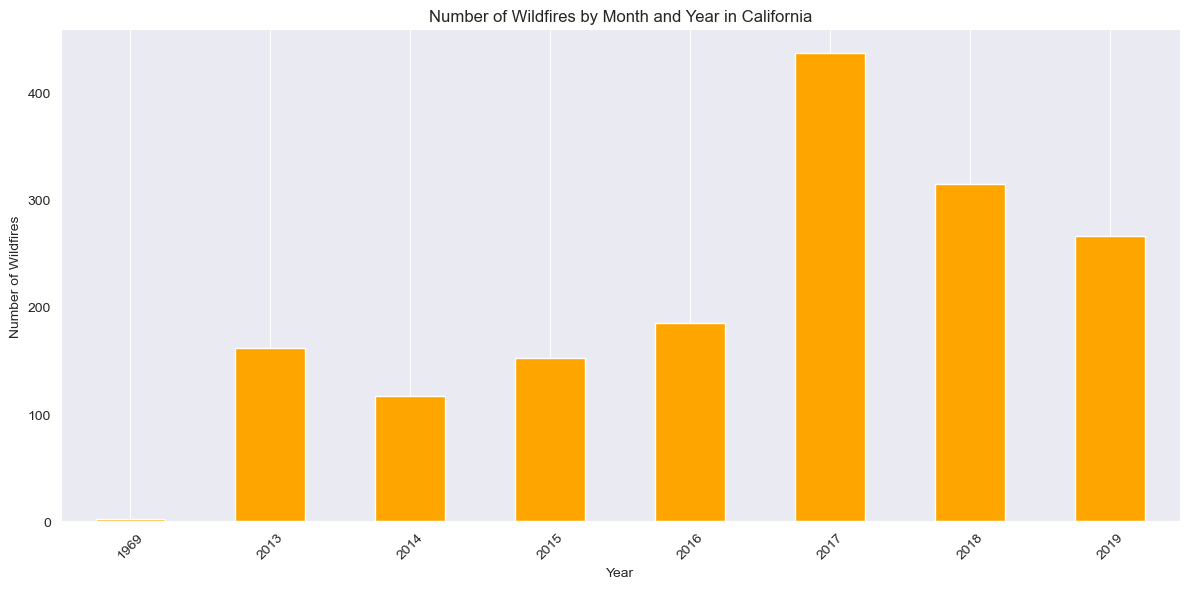

In [212]:
number_wildfires=df

number_wildfires=number_wildfires.astype({"Started":str})

# Split the 'datetime' column into 'date' and 'time'
number_wildfires[['date', 'time']] = number_wildfires['Started'].str.split(' ', expand=True)

# Split the 'datetime' column into 'date' and 'time'
number_wildfires[["year",'month', 'day']] = number_wildfires['date'].str.split('-', expand=True)


number_wildfires=number_wildfires.astype({"year":int,"month":int,"day":int})

monthly_wildfires = number_wildfires.groupby('year').size()

plt.figure(figsize=(12, 6))
monthly_wildfires.plot(kind='bar', color='orange')
plt.title('Number of Wildfires by Month and Year in California')
plt.xlabel('Year')
plt.ylabel('Number of Wildfires')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()


Please write a year from which you are interested to have information  2018


<Figure size 1200x600 with 0 Axes>

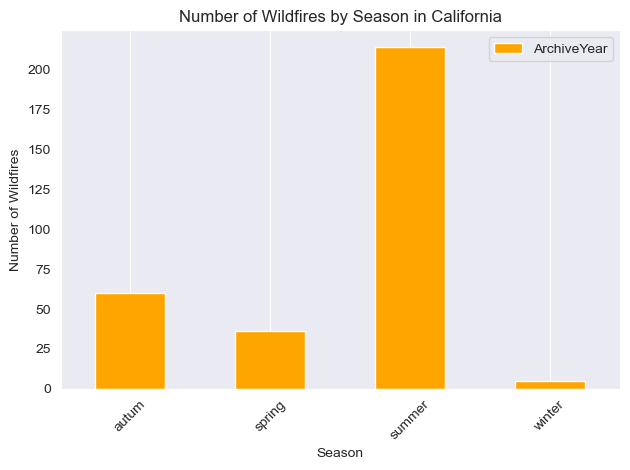

In [185]:
number_wildfires["seasons"] = None

for index in range(len(df)):
    month = number_wildfires.at[index, 'month'] 
    if month==12 or month==1 or month==2:
        season="winter"
        number_wildfires.at[index, 'seasons'] = season 
    elif month==3 or month==4 or month==5:
        season="spring"
        number_wildfires.at[index, 'seasons'] = season 
    elif month==6 or month==7 or month==8:
            season="summer"
            number_wildfires.at[index, 'seasons'] = season
    elif month==9 or month==10 or month==11:
            season="autum"
            number_wildfires.at[index, 'seasons'] = season


season_wildfires = number_wildfires.groupby('seasons').size()


year = int(input("Please write a year from which you are interested to have information "))
query =number_wildfires[(number_wildfires["year"]==year)].groupby(["seasons"]).count()
query_result=query[["ArchiveYear"]]
plt.figure(figsize=(12, 6))
query_result.plot(kind='bar', color='orange')
plt.title('Number of Wildfires by Season in California')
plt.xlabel('Season')
plt.ylabel('Number of Wildfires')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  
plt.show()

Enter the number of records to display in the bar chart (max 1636):  9


C:\Users\danie\AppData\Local\Temp\ipykernel_13968\359102185.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Name', y='Duration in hours', data=df_subset, palette='viridis')  # Assign to bar_plot


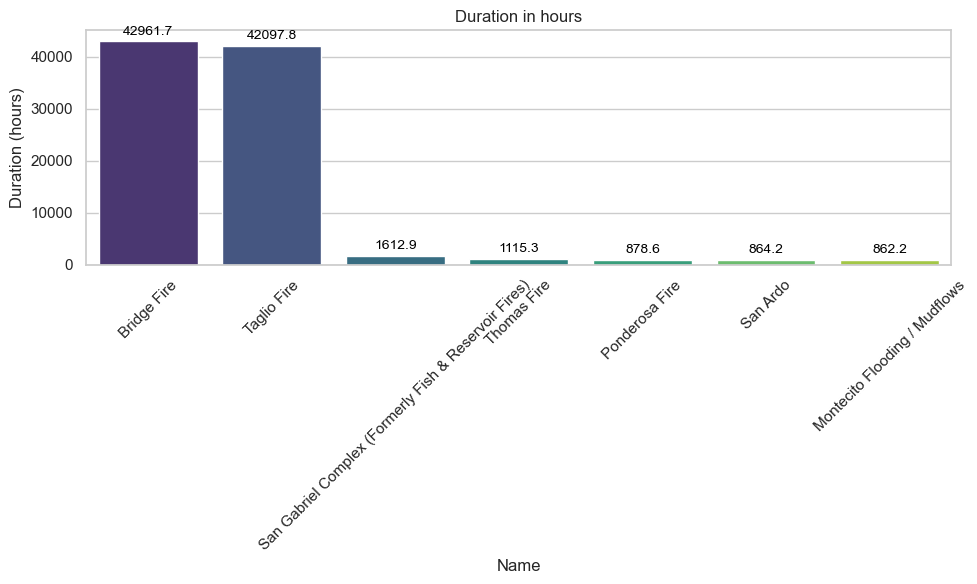

In [234]:
#MIN_YEAR, MAX_YEAR = 2013,2019
#start_year = int(input(f"Enter the start year ({MIN_YEAR}-{MAX_YEAR}): "))
#end_year = int(input(f"Enter the end year ({MIN_YEAR}-{MAX_YEAR}): "))

df['Started'] = pd.to_datetime(df['Started'], format="%Y-%m-%dT%H:%M:%SZ")
df['Extinguished'] = pd.to_datetime(df['Extinguished'], format="%Y-%m-%dT%H:%M:%SZ")

# Calculate fire duration
df["Fire duration"] = df["Extinguished"] - df["Started"]

# Convert duration to hours
df['Duration in hours'] = df['Fire duration'].dt.total_seconds() / 36000

# Sort data frame by duration from highest to lowest
df_sorted = df.sort_values(by='Duration in hours', ascending=False)

# Ask the user for the number of records to display
num_records = int(input("Enter the number of records to display in the bar chart (max {}): ".format(len(df_sorted))))

# Ensure the user does not exceed the number of available records
if num_records > len(df_sorted):
    print("Number exceeds available records. Displaying all records instead.")
    num_records = len(df_sorted)

# Slice the DataFrame to get the desired number of records
df_subset = df_sorted.head(num_records)

# Plot the data
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Name', y='Duration in hours', data=df_subset, palette='viridis')  # Assign to bar_plot

# Set the title and labels
plt.title('Duration in hours')
plt.xlabel("Name")
plt.ylabel('Duration (hours)')

# Display the values on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='baseline', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # Offset the text by 5 points vertically
                      textcoords='offset points')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [242]:
new_df=df
new_df=new_df.astype({"Started":str})

# Split the 'datetime' column into 'date' and 'time'
new_df[['date', 'time']] = new_df['Started'].str.split(' ', expand=True)

# Split the 'datetime' column into 'date' and 'time'
new_df[["year",'month', 'day']] = new_df['date'].str.split('-', expand=True)


new_df=new_df.astype({"year":int,"month":int,"day":int})


Please select the resource you want information from (Dozers, Helicopter, Engines, WaterTenders):  Dozers


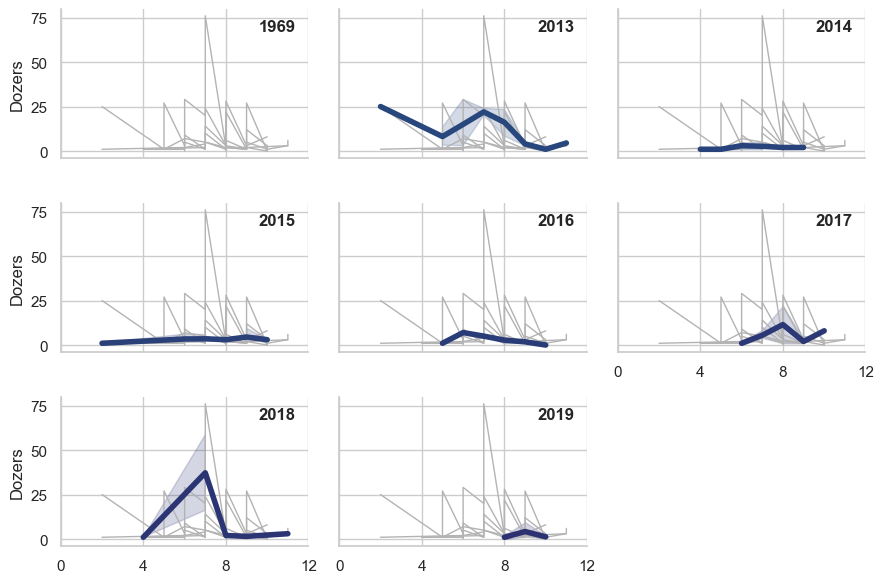

In [241]:
resource = input("Please select the resource you want information from (Dozers, Helicopter, Engines, WaterTenders): ")

# Check if the input is valid
valid_resources = ["Dozers", "Helicopter", "Engines", "WaterTenders"]
if resource not in valid_resources:
    raise ValueError(f"Invalid resource selected. Please choose from: {', '.join(valid_resources)}")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=new_df,
    x="month", y=resource, col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=new_df, x="month", y=resource, units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x-axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", resource)
g.tight_layout()
